# Reconciling PCA and PPCA

PPCA is demeaned and standardized by default


In [247]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from ppca import PPCA

In [584]:
raw_returns = np.random.normal(0.005, 0.01, (120,20)) + 1.1*np.random.normal(0.01, 0.005, (120,1)) + 1.2*np.random.normal(0.01, 0.005, (120,1)) + np.random.normal(0.005, 0.01, (120,1)) + np.random.normal(0.005, 0.002, (120,1))

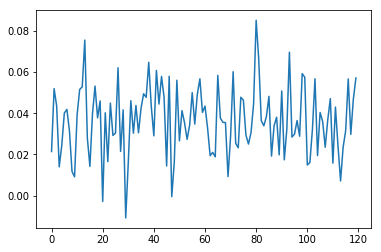

In [585]:
plt.plot(raw_returns[:,1])

In [586]:
raw_returns.shape

(120, 20)

In [587]:
scaler = StandardScaler()
scaler.fit(raw_returns)
returns = scaler.transform(raw_returns)

## Fit Both Models

In [588]:
n_comp = 3

In [589]:
mod = PCA(n_components=n_comp)
modp = PPCA()

In [590]:
mod.fit(returns)
modp.fit(returns, d=n_comp, tol=1e-5)

## Compare Betas

It's ok if signs don't match; that's a feature of PCA.

In [591]:
betas = mod.components_.T
betas.shape

(20, 3)

In [592]:
betasp = modp.C
betasp.shape

(20, 3)

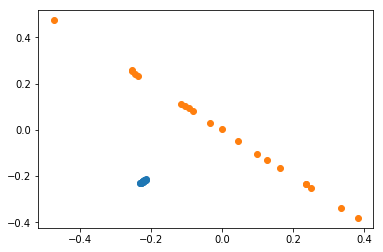

In [593]:
plt.scatter(betas[:,0], betasp[:,0]);
plt.scatter(betas[:,1], betasp[:,1]);

## Compare recovered factor returns

In [594]:
# for each factor, what is the return per date
factor_returns = mod.transform(returns)
factor_returns.shape

(120, 3)

In [595]:
factor_returnsp = modp.transform()
factor_returnsp.shape

(120, 3)

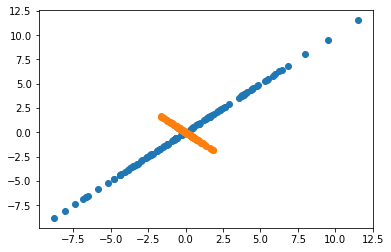

In [596]:
plt.scatter(factor_returns[:,0], factor_returnsp[:,0]);
plt.scatter(factor_returns[:,1], factor_returnsp[:,1]);

## Compare factor volatility

In [597]:
common_factor_volatility = np.std(factor_returns, axis=0)
common_factor_volatilityp = np.std(factor_returnsp, axis=0)

In [598]:
print(common_factor_volatility)
print(common_factor_volatilityp)

[3.74803076 0.74580423 0.7400688 ]
[3.74803076 0.74580176 0.7400645 ]


## Compare explained variance

In [599]:
mod.explained_variance_ratio_

array([0.70238673, 0.0278112 , 0.02738509])

In [600]:
np.diff(np.append(0, modp.var_exp))

array([0.70828914, 0.02804472, 0.0276149 ])

# Recover Common Returns (predicted returns)

In [533]:
# for each stock, what is the return attributable to all common factors for each date
common_returns = np.dot(factor_returns, betas.T)

In [534]:
common_returns.shape

(120, 20)

In [535]:
residuals = returns - common_returns

In [536]:
resid_volatility = np.std(residuals, axis=0)

### Inverse Transform to go from scaled space to original space

In [537]:
recons = scaler.inverse_transform(common_returns)

In [538]:
recons.shape

(120, 20)

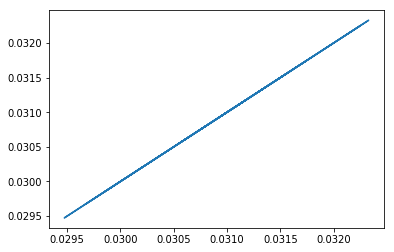

In [539]:
plt.plot(np.mean(recons, axis=0), np.mean(raw_returns, axis=0));

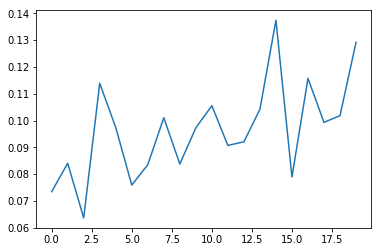

In [540]:
plt.plot((np.std(raw_returns, axis=0)-np.std(recons, axis=0))/np.std(raw_returns, axis=0))

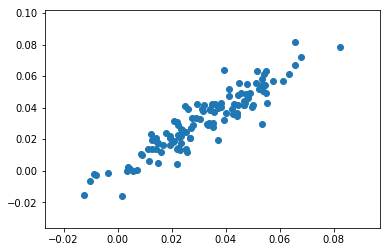

In [541]:
plt.scatter(recons[:,0], raw_returns[:,0])

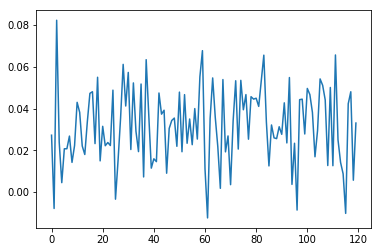

In [549]:
plt.plot(recons[:,0])